# Explore Pommeroye Catchment data

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime

In [2]:
file = 'Pommeroye_catchement_2016_2017.csv'
df = pd.read_csv(file)

In [3]:
strings = df.Date
date = []
for string in strings:
    date.append(datetime.datetime.strptime(string, '%d/%m/%y'))
df['Date (ISO)'] = date

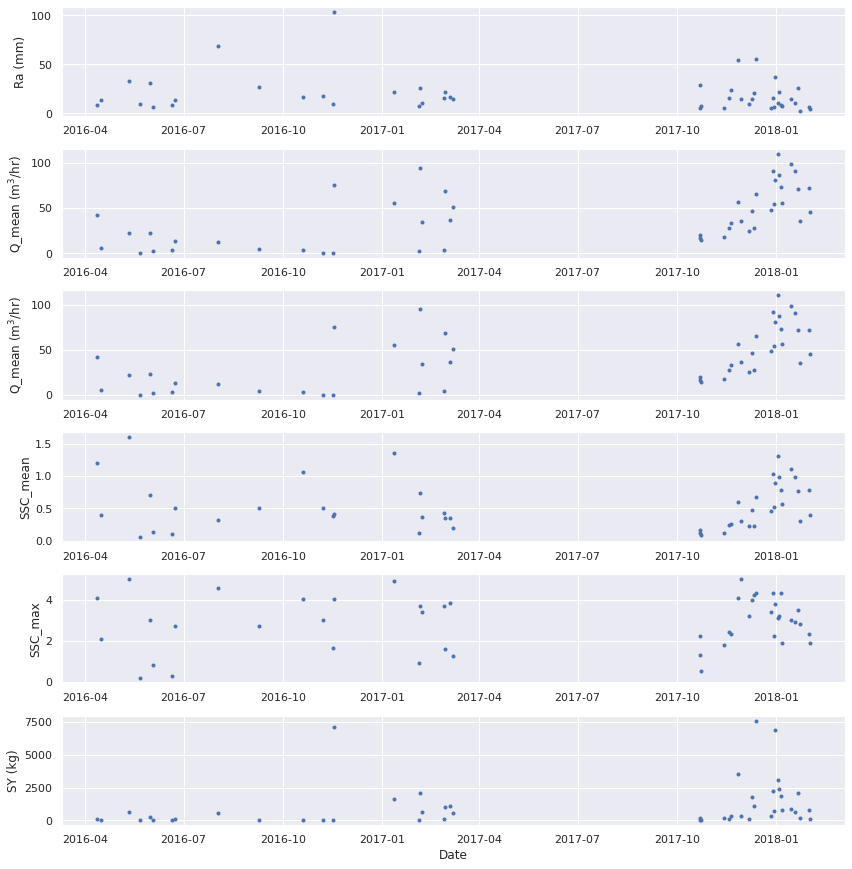

In [4]:
sns.set(rc={'figure.figsize':(12, 12)})
fig = plt.figure()
cols_plot = ['Ra (mm)', 'Q_mean (m$^3$/hr)', 'Q_mean (m$^3$/hr)', 'SSC_mean', 'SSC_max', 'SY (kg)']

i = 0
for axs in range(611,617):
    ax = plt.subplot(axs)
    ax.scatter(df['Date (ISO)'].astype('O'), df[cols_plot[i]], marker='.')
    plt.ylabel(cols_plot[i])
    i += 1

plt.tight_layout()
ax.fmt_xdata = mdates.DateFormatter('%d-%m-%y')
plt.xlabel('Date')
plt.show()

In [6]:
season = np.ones(np.shape(date))
i = 0
for day in date:
    if day > datetime.datetime.strptime('2017-07-01', '%Y-%m-%d'):
        season[i] = 2
    i += 1
df['season'] = season

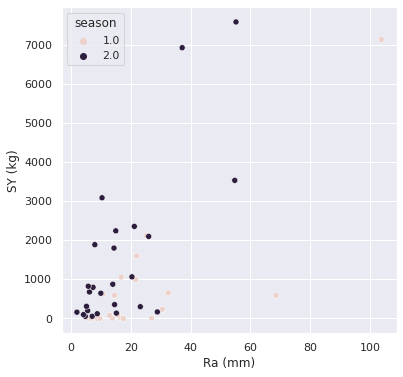

In [7]:
plt.figure(figsize=[6, 6])
g = sns.scatterplot(x='Ra (mm)', y='SY (kg)', hue='season', data=df)
plt.show()